# Multivariate risk management. Part 1

## Content

- Data
    - Upload and visualize data
    - Preprocess prices and transform to returns
    - Plot histograms
    
    
- Simple models 
    - Product of univariate distributions
    - Multivariate Normal distribution
    
    
- Kernel Density estimation
    - Univariate case
    - Multivariate case
    
    
- Backtesting
    - Kupiec test
    
    
    
    
    
## References
- [Multivariate Models](https://github.com/qrmtutorial/qrm/blob/master/slides/qrm_06.pdf)
- [Density Estimation](https://scikit-learn.org/stable/modules/density.html)

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
# plt.style.use(['seaborn-darkgrid'])
plt.rcParams['font.family'] = 'DejaVu Sans'
# %config InlineBackend.figure_formats=["png"]

## Data

### Upload and visualize data

Get the data for the Dow Jones Industrial Average stocks by specifying the stock tickers, start date, and end date

https://finance.yahoo.com/quote/%5EDJI/components?p=%5EDJI

In [2]:
# Students are advised to use other data sources. This is just for the sake of brevity.
# !pip install yfinance

In [2]:
import yfinance as yf

# selected_companies = ['AAPL',  'MSFT', 'MMM']
selected_companies = ['AAPL',  'MSFT', 'MMM', 'NKE', 'GS']

dwj_companies = 'VZ UNH JNJ PG MRK RTX KO WBA MMM WMT MSFT IBM INTC AAPL CSCO '
dwj_companies += 'NKE CAT PFE XOM MCD JPM HD V GS DIS AXP CVX TRV BA' # DOW

data = yf.download(dwj_companies, '2016-01-01','2019-12-31' , group_by="column")

data.head()

[*********************100%***********************]  29 of 29 downloaded


Adj Close                                                     \
                AAPL    AXP      BA    CAT   CSCO    CVX    DIS      GS   
Date                                                                      
2015-12-31     97.86  64.35  128.68  58.10  23.34  74.66  99.14  167.31   
2016-01-04     97.95  62.53  125.04  58.12  22.87  73.74  97.16  164.45   
2016-01-05     95.49  61.57  125.55  57.52  22.77  74.37  95.19  161.61   
2016-01-06     93.63  59.86  123.55  56.61  22.52  71.43  94.68  157.67   
2016-01-07     89.67  59.32  118.37  54.66  22.00  68.90  93.87  152.82   

                            ...      Volume                          \
                HD     IBM  ...         PFE          PG         RTX   
Date                        ...                                       
2015-12-31  118.99  112.70  ...  21103900.0   5077700.0   4689100.0   
2016-01-04  117.93  111.33  ...  37307800.0  11529800.0   8552300.0   
2016-01-05  117.35  111.25  ...  27303600.0   8133700.0   6758100.0   
2016-01-06  116.14  110.69  ...  25846600.0   9551000.0  13189600.0   
2016-01-07  112.82  108.80  ...  37213600.0  11973900.0  11098800.0   

                                                                      \
                  TRV        UNH           V          VZ         WBA   
Date                                                                   
2015-12-31   956100.0  2372500.0   6538300.0  11490900.0   2528700.0   
2016-01-04  2846000.0  4991000.0  13476800.0  17821600.0   6347600.0   
2016-01-05  1870400.0  2816800.0   8972700.0  15632800.0   7603100.0   
2016-01-06  1730900.0  2677300.0  16092000.0  19082700.0  11659200.0   
2016-01-07  2284400.0  5277200.0  12470800.0  19277600.0  11362000.0   

                                    
                   WMT         XOM  
Date                                
2015-12-31   6575100.0  10285500.0  
2016-01-04  11989200.0  20400100.0  
2016-01-05  13326000.0  11993500.0  
2016-01-06  16564600.0  18826900.0  
2016-01-07  26430000.0  21263800.0  

[5 rows x 174 columns]

In [3]:
prices = data['Adj Close'].dropna()

print(prices.shape)
prices.head()

(1006, 29)


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,97.86,64.35,128.68,58.10,23.34,74.66,99.14,167.31,118.99,112.70,...,27.04,68.74,54.12,101.62,109.57,75.04,37.41,76.08,54.82,64.27
2016-01-04,97.95,62.53,125.04,58.12,22.87,73.74,97.16,164.45,117.93,111.33,...,26.77,67.84,53.84,99.02,108.47,73.25,37.12,74.19,54.97,63.87
2016-01-05,95.49,61.57,125.55,57.52,22.77,74.37,95.19,161.61,117.35,111.25,...,26.96,68.05,53.93,99.47,108.68,73.81,37.63,72.24,56.27,64.41
2016-01-06,93.63,59.86,123.55,56.61,22.52,71.43,94.68,157.67,116.14,110.69,...,26.48,67.40,52.46,98.18,107.57,72.84,37.29,71.14,56.83,63.88
2016-01-07,89.67,59.32,118.37,54.66,22.00,68.90,93.87,152.82,112.82,108.80,...,26.30,66.81,51.77,95.84,104.40,71.41,37.09,72.51,58.16,62.86


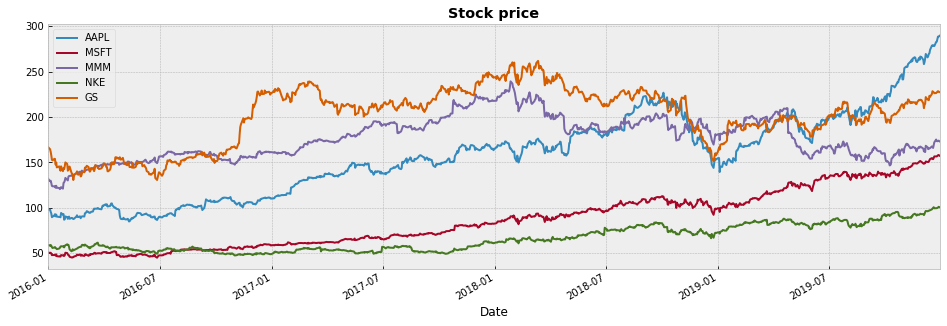

In [4]:
prices.loc[:,selected_companies].plot(figsize=(16, 5))
plt.title("Stock price", weight="bold")

plt.show()

### Preprocess prices and transform to returns

We convert datetime index to period

In [5]:
print(prices.index)

prices.index = prices.index.to_period(freq='d')

print(prices.index)

DatetimeIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)
PeriodIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
             '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
             '2016-01-13', '2016-01-14',
             ...
             '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
             '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
             '2019-12-27', '2019-12-30'],
            dtype='period[D]', name='Date', length=1006, freq='D')


In [6]:
returns = prices.pct_change().dropna()

returns.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.000920,-0.028283,-0.028287,0.000344,-0.020137,-0.012323,-0.019972,-0.017094,-0.008908,-0.012156,...,-0.009985,-0.013093,-0.005174,-0.025586,-0.010039,-0.023854,-0.007752,-0.024842,0.002736,-0.006224
2016-01-05,-0.025115,-0.015353,0.004079,-0.010323,-0.004373,0.008544,-0.020276,-0.017270,-0.004918,-0.000719,...,0.007097,0.003096,0.001672,0.004545,0.001936,0.007645,0.013739,-0.026284,0.023649,0.008455
2016-01-06,-0.019478,-0.027773,-0.015930,-0.015821,-0.010979,-0.039532,-0.005358,-0.024380,-0.010311,-0.005034,...,-0.017804,-0.009552,-0.027258,-0.012969,-0.010213,-0.013142,-0.009035,-0.015227,0.009952,-0.008229
2016-01-07,-0.042294,-0.009021,-0.041926,-0.034446,-0.023091,-0.035419,-0.008555,-0.030760,-0.028586,-0.017075,...,-0.006798,-0.008754,-0.013153,-0.023834,-0.029469,-0.019632,-0.005363,0.019258,0.023403,-0.015967
2016-01-08,0.005353,-0.003203,-0.022641,-0.010062,-0.024545,-0.010740,-0.002450,-0.004122,-0.011966,-0.009283,...,-0.012548,-0.015716,-0.016226,-0.004174,-0.017146,-0.012323,-0.009706,-0.001379,-0.022868,-0.020204


### Plot histograms

Look at histograms and scatterplots for some stocks

<Figure size 504x504 with 0 Axes>

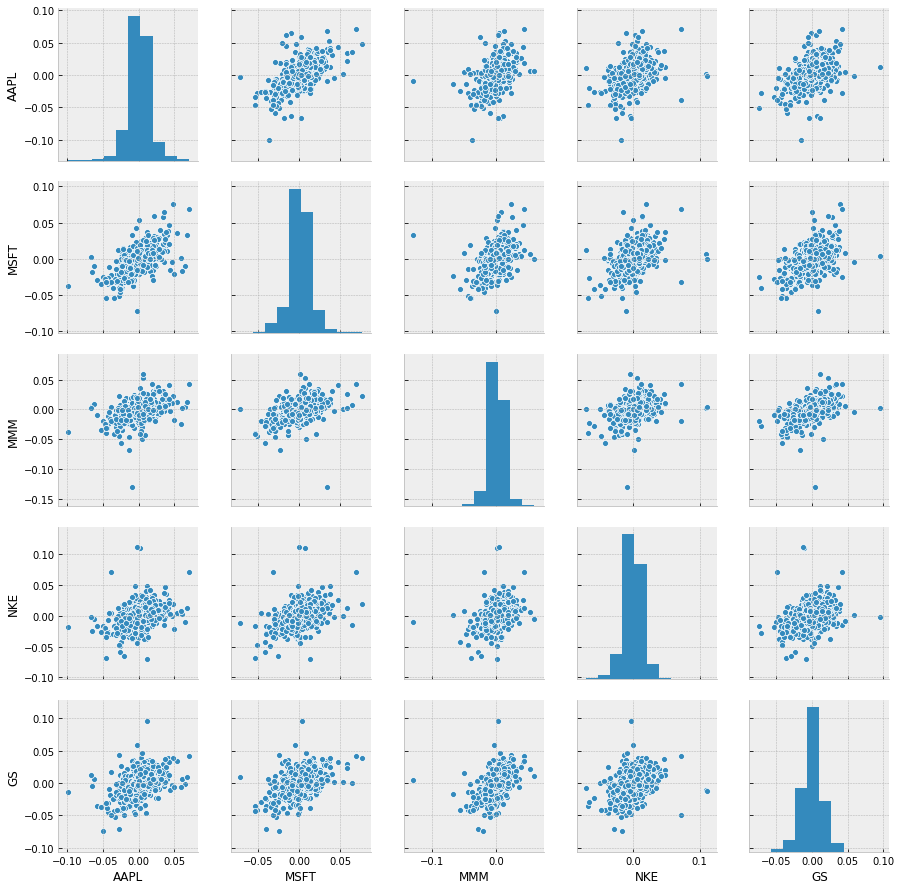

In [7]:
fig = plt.figure(figsize=(7, 7))

sns.pairplot(returns[selected_companies])

plt.show()

Let's consider a case of equally-weighted portfolio

In [13]:
# w = np.ones(shape=(returns.shape[1],)) / returns.shape[1]

w = 1 / prices.iloc[0]
w = w / w.sum()
portfolio_real_returns = np.dot(returns.values, w)

# w_temp = np.ones(shape=(len(selected_companies),)) / len(selected_companies)

w_temp = 1 / prices[selected_companies].iloc[0]
w_temp = w_temp / w_temp.sum()
portfolio_real_returns_selected = np.dot(returns[selected_companies].values, w_temp)
portfolio_real_returns_selected = pd.Series(portfolio_real_returns_selected, index=returns.index)

print(w)
print(w_temp)

AAPL    0.021303
AXP     0.032396
BA      0.016200
CAT     0.035881
CSCO    0.089318
CVX     0.027922
DIS     0.021028
GS      0.012460
HD      0.017520
IBM     0.018498
INTC    0.068260
JNJ     0.022914
JPM     0.036217
KO      0.056266
MCD     0.019846
MMM     0.015726
MRK     0.045181
MSFT    0.040972
NKE     0.035238
PFE     0.077096
PG      0.030327
RTX     0.038519
TRV     0.020514
UNH     0.019026
V       0.027781
VZ      0.055725
WBA     0.027401
WMT     0.038028
XOM     0.032436
Name: 2015-12-31, dtype: float64
AAPL    0.169473
MSFT    0.325956
MMM     0.125110
NKE     0.280335
GS      0.099125
Name: 2015-12-31, dtype: float64


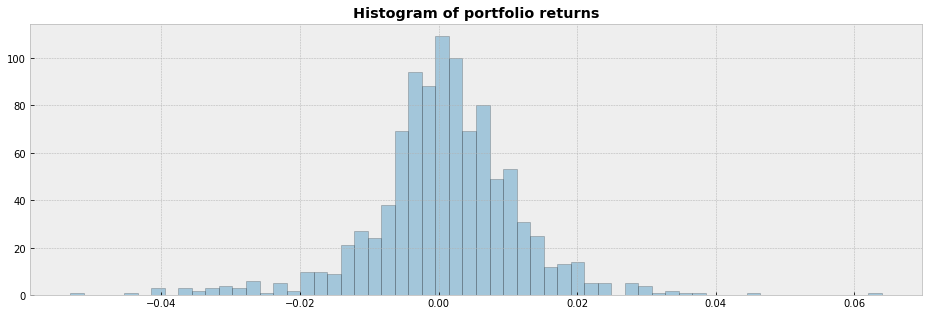

In [15]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(portfolio_real_returns_selected, hist=True, kde=False, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Histogram of portfolio returns", weight="bold")

plt.show()

And for additional vizualization let's look at join distribution of only two stocks

In [16]:
ticker_one = 'AAPL'
ticker_two = 'MMM'

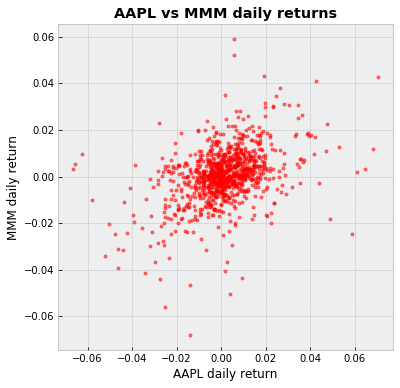

In [18]:
my_lim = 0.08

idx = (np.abs(returns[ticker_one]) < my_lim) & (np.abs(returns[ticker_two]) < my_lim)

x = returns.loc[idx, ticker_one]
y = returns.loc[idx, ticker_two]

fig = plt.figure(figsize=(6, 6))

plt.plot(x, y, "r.", alpha=0.5)

plt.xlabel("{} daily return".format(ticker_one))
plt.ylabel("{} daily return".format(ticker_two))
plt.title("{} vs {} daily returns".format(ticker_one, ticker_two), weight="bold")

plt.show()

In [19]:
alpha = 0.05

## Simple models 


### Product of univariate distributions

Here we take a t-Student distribution

In [20]:
import scipy.stats as ss

n_samples = 10 ** 4

return_simulations = {}

# для каждой акции оцениваем одномерное распределение, а потом сэмплируем из него новые псевдо-наблюдения
for col in returns.columns:
    t_df, t_mean, t_sigma = ss.t.fit(returns[col])
    return_simulations[col] = ss.t.rvs(t_df, loc=t_mean, scale=t_sigma, size=n_samples, random_state=42)
    
return_simulations = pd.DataFrame(return_simulations)

return_simulations.shape

(10000, 29)

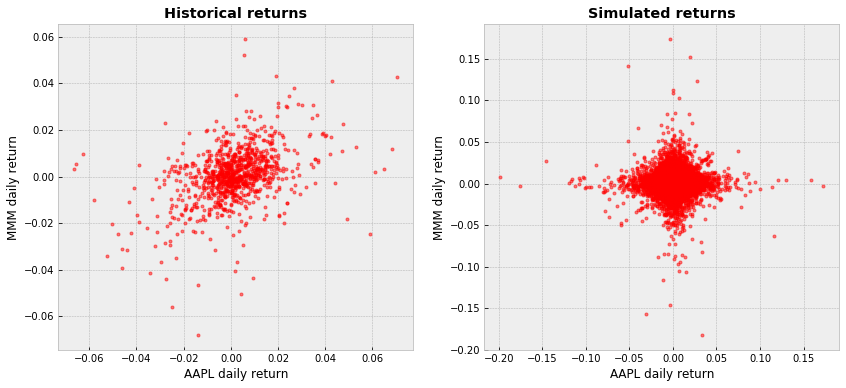

In [21]:
fig = plt.figure(figsize=(14, 6))

plt1 = fig.add_subplot(1,2,1)
plt2 = fig.add_subplot(1,2,2)

my_lim = 0.08
idx = (np.abs(returns[ticker_one]) < my_lim) & (np.abs(returns[ticker_two]) < my_lim)
x = returns.loc[idx, ticker_one]
y = returns.loc[idx, ticker_two]
plt1.plot(x, y, "r.", alpha=0.5)

plt1.set_xlabel("{} daily return".format(ticker_one))
plt1.set_ylabel("{} daily return".format(ticker_two))
plt1.set_title("Historical returns", weight="bold")


my_lim = 0.2
idx = (np.abs(return_simulations[ticker_one]) < my_lim) & (np.abs(return_simulations[ticker_two]) < my_lim)
x = return_simulations.loc[idx, ticker_one]
y = return_simulations.loc[idx, ticker_two]
plt2.plot(x, y, "r.", alpha=0.5)

plt2.set_xlabel("{} daily return".format(ticker_one))
plt2.set_ylabel("{} daily return".format(ticker_two))
plt2.set_title("Simulated returns", weight="bold")

plt.show()

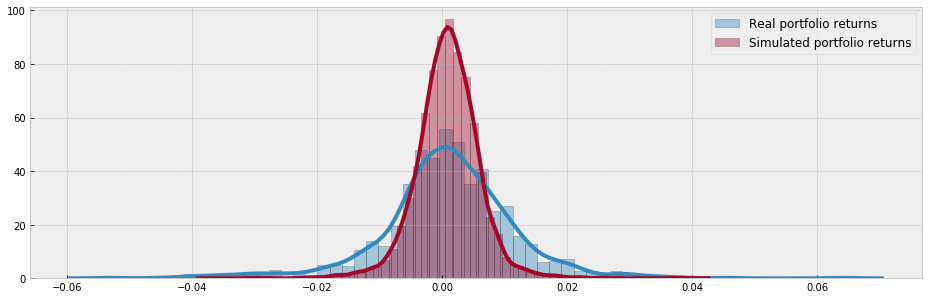

In [22]:
portfolio_simulated_returns = np.dot(return_simulations.values, w)

fig = plt.figure(figsize=(16, 5))

sns.distplot(portfolio_real_returns_selected, hist=True, kde=True, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(portfolio_simulated_returns, hist=True, kde=True, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.legend(['Real portfolio returns',
            'Simulated portfolio returns'], fontsize=12)
plt.show()

In [23]:
# умножаем матрицу псевдо-наблюдений на вектор весов и получаем псевдо-наблюдения доходностей портфеля

print(np.quantile(portfolio_real_returns_selected, alpha))
print(np.quantile(portfolio_simulated_returns, alpha))

-0.016684940782557837
-0.0069627161270087515


#### Wrapping into functions

In [24]:
def make_dummy_student_simulations(returns, n_samples=10**3):
    
    return_simulations = {}

    for col in returns.columns:
        t_df, t_mean, t_sigma = ss.t.fit(returns[col])
        return_simulations[col] = ss.t.rvs(t_df, loc=t_mean, scale=t_sigma, size=n_samples, random_state=42)

    return_simulations = pd.DataFrame(return_simulations)

    return return_simulations


def calc_VaR(r, sampling_fun, w, L_history=252, level=0.05):
    VaR = np.full(r.shape[0], np.nan)
    
    for i in range(L_history, r.shape[0]):
        history = r[i - L_history: i]
        
        try:
            return_simulations = sampling_fun(history)
            portfolio_simulated_returns = np.dot(return_simulations.values, w)

            VaR[i] = np.quantile(portfolio_simulated_returns, level)
            
        except:
            VaR[i] = VaR[i-1]
        
    return pd.Series(data=VaR, index=r.index, name=sampling_fun.__name__)

In [25]:
# VaR_HS = calc_VaR(returns[selected_companies], make_dummy_HS_simulations, w_temp)
VaR_t = calc_VaR(returns[selected_companies], make_dummy_student_simulations, w_temp)

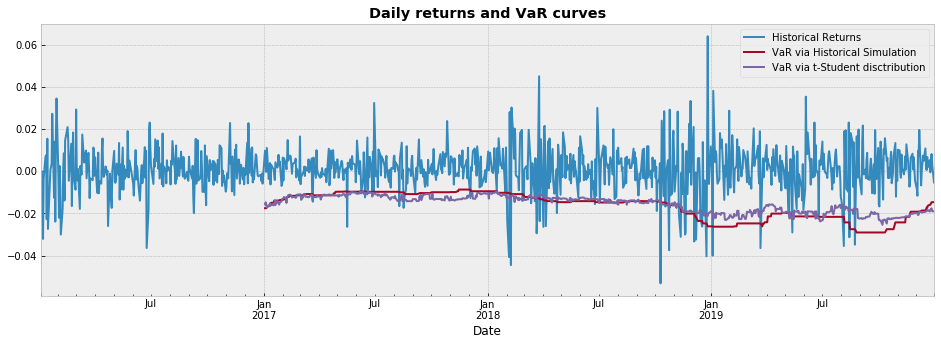

In [26]:
fig = plt.figure(figsize=(16, 5))

portfolio_real_returns_selected.plot()
# VaR_HS.plot()
VaR_t.plot()

plt.title("Daily returns and VaR curves", weight="bold")

plt.legend(['Historical Returns',
#             'VaR via Historical Simulation',
            'VaR via t-Student disctribution'])

plt.show()

###  Multivariate Normal distribution

In [27]:
n_samples = 10 ** 4

# estimate parameters of multivariate normal
mean = np.mean(returns.values, axis=0)
cov = np.cov(returns.values, rowvar=False)

# and sample new pseudo-observations
return_simulations = ss.multivariate_normal.rvs(mean=mean, cov=cov, size=n_samples, random_state=42)

return_simulations = pd.DataFrame(return_simulations, columns=returns.columns)

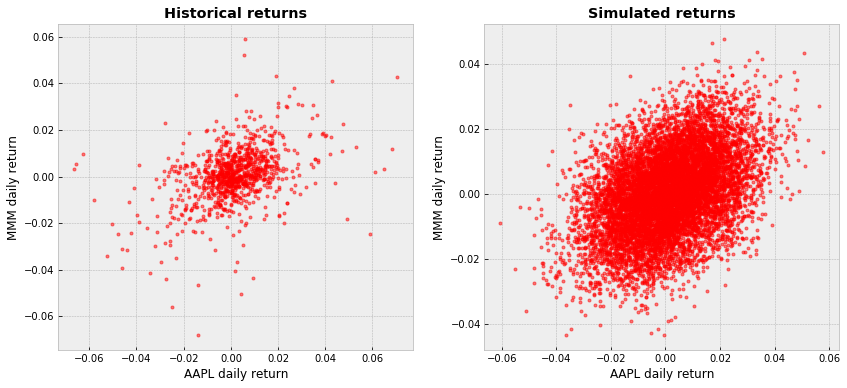

In [28]:
fig = plt.figure(figsize=(14, 6))

plt1 = fig.add_subplot(1,2,1)
plt2 = fig.add_subplot(1,2,2)

my_lim = 0.08
idx = (np.abs(returns[ticker_one]) < my_lim) & (np.abs(returns[ticker_two]) < my_lim)
x = returns.loc[idx, ticker_one]
y = returns.loc[idx, ticker_two]
plt1.plot(x, y, "r.", alpha=0.5)

plt1.set_xlabel("{} daily return".format(ticker_one))
plt1.set_ylabel("{} daily return".format(ticker_two))
plt1.set_title("Historical returns", weight="bold")


my_lim = 0.2
idx = (np.abs(return_simulations[ticker_one]) < my_lim) & (np.abs(return_simulations[ticker_two]) < my_lim)
x = return_simulations.loc[idx, ticker_one]
y = return_simulations.loc[idx, ticker_two]
plt2.plot(x, y, "r.", alpha=0.5)

plt2.set_xlabel("{} daily return".format(ticker_one))
plt2.set_ylabel("{} daily return".format(ticker_two))
plt2.set_title("Simulated returns", weight="bold")

plt.show()

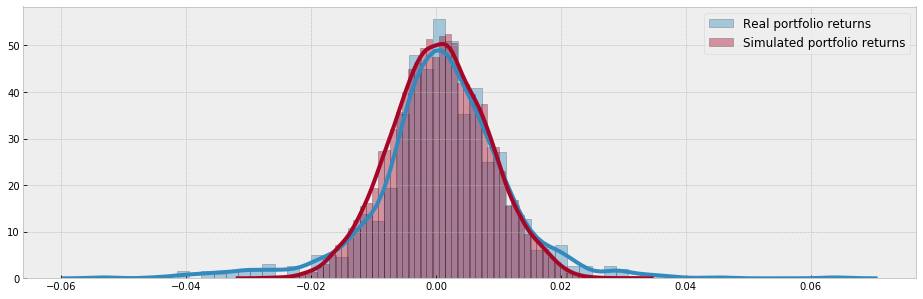

In [29]:
portfolio_simulated_returns = np.dot(return_simulations.values, w)

fig = plt.figure(figsize=(16, 5))

sns.distplot(portfolio_real_returns_selected, hist=True, kde=True, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(portfolio_simulated_returns, hist=True, kde=True, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.legend(['Real portfolio returns',
            'Simulated portfolio returns'], fontsize=12)
plt.show()

In [30]:
print(np.quantile(portfolio_real_returns_selected, alpha))
print(np.quantile(portfolio_simulated_returns, alpha))

-0.016684940782557837
-0.012265203751601454


#### Wrapping into functions

In [31]:
def make_mult_normal_simulations(returns, n_samples=10**3):

    mean = np.mean(returns.values, axis=0)
    cov = np.cov(returns.values, rowvar=False)

    return_simulations = ss.multivariate_normal.rvs(mean=mean, cov=cov, size=n_samples, random_state=42)

    return_simulations = pd.DataFrame(return_simulations, columns=returns.columns)

    return return_simulations

In [32]:
VaR_multy_normal = calc_VaR(returns[selected_companies], make_mult_normal_simulations, w_temp)

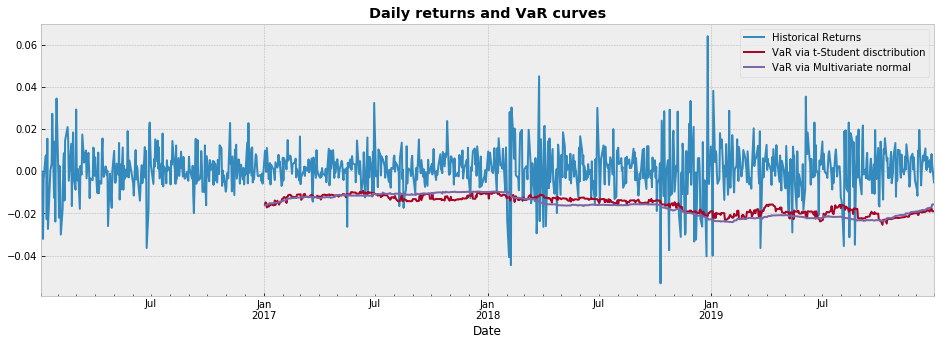

In [33]:
fig = plt.figure(figsize=(16, 5))

portfolio_real_returns_selected.plot()
# VaR_HS.plot()
VaR_t.plot()
VaR_multy_normal.plot()

plt.title("Daily returns and VaR curves", weight="bold")

plt.legend(['Historical Returns',
#             'VaR via Historical Simulation',
            'VaR via product of t-Student disctribution',
           'VaR via Multivariate normal'])

plt.show()

###  Kernel Density estimation

#### Univariate case

In [34]:
ret = returns.loc[:, ticker_one].values

kde = ss.gaussian_kde(ret)

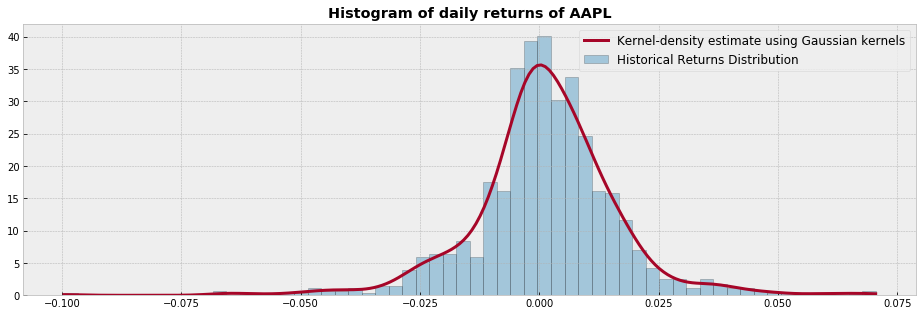

In [35]:
fig = plt.figure(figsize=(16, 5))

x = np.linspace(ret.min(), ret.max(), 200)

y_pdf = kde.pdf(x)

sns.distplot(ret, hist=True, kde=False, 
             bins=60, norm_hist=True,
             hist_kws={'edgecolor':'black'})
plt.plot(x, y_pdf, linewidth=3)

plt.title("Histogram of daily returns of {}".format(ticker_one), weight="bold")
plt.legend(['Kernel-density estimate using Gaussian kernels', 
            'Historical Returns Distribution'], fontsize=12)

plt.show()

#### Multivariate case

In [36]:
n_samples = 10 ** 4

# estimate parameters of multivariate normal
kde = ss.gaussian_kde(returns.values.T)

# and sample new pseudo-observations
return_simulations = kde.resample(size=n_samples).T

return_simulations = pd.DataFrame(return_simulations, columns=returns.columns)

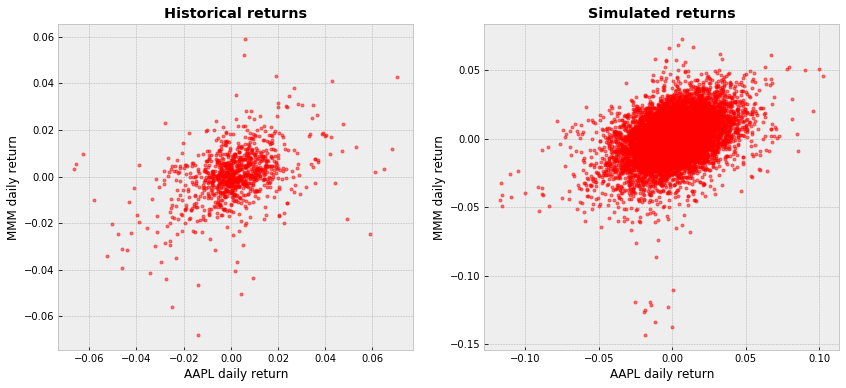

In [37]:
fig = plt.figure(figsize=(14, 6))

plt1 = fig.add_subplot(1,2,1)
plt2 = fig.add_subplot(1,2,2)

my_lim = 0.08
idx = (np.abs(returns[ticker_one]) < my_lim) & (np.abs(returns[ticker_two]) < my_lim)
x = returns.loc[idx, ticker_one]
y = returns.loc[idx, ticker_two]
plt1.plot(x, y, "r.", alpha=0.5)

plt1.set_xlabel("{} daily return".format(ticker_one))
plt1.set_ylabel("{} daily return".format(ticker_two))
plt1.set_title("Historical returns", weight="bold")


my_lim = 0.2
idx = (np.abs(return_simulations[ticker_one]) < my_lim) & (np.abs(return_simulations[ticker_two]) < my_lim)
x = return_simulations.loc[idx, ticker_one]
y = return_simulations.loc[idx, ticker_two]
plt2.plot(x, y, "r.", alpha=0.5)

plt2.set_xlabel("{} daily return".format(ticker_one))
plt2.set_ylabel("{} daily return".format(ticker_two))
plt2.set_title("Simulated returns", weight="bold")

plt.show()

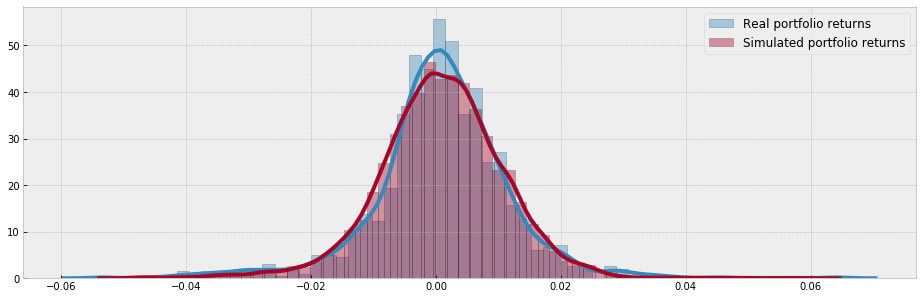

In [38]:
portfolio_simulated_returns = np.dot(return_simulations.values, w)

fig = plt.figure(figsize=(16, 5))

sns.distplot(portfolio_real_returns_selected, hist=True, kde=True, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(portfolio_simulated_returns, hist=True, kde=True, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.legend(['Real portfolio returns',
            'Simulated portfolio returns'], fontsize=12)
plt.show()

In [39]:
print(np.quantile(portfolio_real_returns_selected, alpha))
print(np.quantile(portfolio_simulated_returns, alpha))

-0.016684940782557837
-0.015186500110220859


## Backtesting VaR

In [61]:
def calc_hits(returns, VaRs):
    return ((VaRs - returns).dropna() > 0).values

In [62]:
def zone(p):
    if p > 0.05:
        return 'green'
    elif p > 0.0001:
        return 'yellow'
    else:
        return 'red'

In [63]:
def backtest_VaR(r, VaR, level, L=None):
    # to skip starting NaNs
    if L is None:
        L = (~VaR.isna()).to_numpy().nonzero()[0][0];
    r = r[L:]
    VaR = VaR[L:]
    
    hits = calc_hits(r, VaR)    
    
    p_value_two_sided = ss.binom_test(sum(hits), len(hits), 1-level, alternative = 'two-sided')
    p_value_conservative = ss.binom_test(sum(hits), len(hits), 1-level, alternative = 'greater')
    print(f'Backtesting {VaR.name}:')
    print(f'The proportion of hits is {(sum(hits)/len(hits))*100:.3}% instead of expected {(1-level)*100:.3}%')
    print(f'Two-sided p-val {p_value_two_sided:.3}, one-sided: {p_value_conservative:.3}')
    print(f'{zone(p_value_two_sided)} zone\n')

In [64]:
backtest_VaR(portfolio_real_returns_selected, VaR_HS, 1-alpha)
backtest_VaR(portfolio_real_returns_selected, VaR_multy_normal, 1-alpha)
backtest_VaR(portfolio_real_returns_selected, VaR_gmm_6, 1-alpha)
backtest_VaR(portfolio_real_returns_selected, VaR_copulanorm_garch, 1-alpha)

Backtesting make_dummy_HS_simulations:
The proportion of hits is 6.24% instead of expected 5.0%
Two-sided p-val 0.131, one-sided: 0.073
green zone

Backtesting make_mult_normal_simulations:
The proportion of hits is 5.05% instead of expected 5.0%
Two-sided p-val 0.933, one-sided: 0.5
green zone

Backtesting make_gmm_simulations:
The proportion of hits is 6.37% instead of expected 5.0%
Two-sided p-val 0.0936, one-sided: 0.0537
green zone

Backtesting make_copula_simulation_wrap:
The proportion of hits is 5.44% instead of expected 5.0%
Two-sided p-val 0.558, one-sided: 0.31
green zone



## Homework

Download IBM, McDonalds and Microsoft stock price data for a period of '2017-07-01','2020-06-30' and calculate VaR curves for a portfolio (with weights $w_i=1/p_i$) using different approaches:

1. Use multivariate normal (as in the class)
2. Use Historical simulation (modify the implementation from the univariate case)
3. For both approaches, calculate ES curves and plot them as well (take conditional mean, not the single quantile)
4. Optionally, backtest ES

Then plot all VaR and ES curves on one graph and conduct tests to select the most convenient approach. Finally, you should deliver:
1. One graph with daily historical returns and VaR and ES curves
2. p-value for each model you use for VaR tests
3. Optionally, p-value for each model you use for ES tests
4. Conclusion about what approach is the most suitable for this portfolio